make_blobs() : 분류용 가상 데이터 생성 함수
등방성 가우시안 정규분포를 이용해 가상 데이터를 생성한다.

인수

n_samples : 표본 데이터의 수, 디폴트 100
n_features : 독립 변수의 수. 디폴트 2
centers : 정수 또는 [n_centers, n_features] 크기의 배열. 생성할 클러스터의 수 혹은 중심. 디폴트 3
cluster_std: 클러스터의 표준 편차. 디폴트 1.0
center_box: 생성할 클러스터의 바운딩 박스(bounding box), 디폴트 (-10.0, 10.0))
반환값:

X : 독립 변수. [n_samples, n_features] 크기의 배열
y : 종속 변수. [n_samples] 크기의 배열


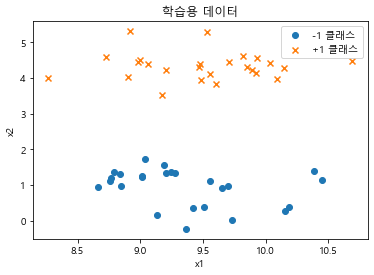

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("학습용 데이터")
plt.show()

In [4]:
from sklearn.svm import SVC
# 슬랙변수(c) : 잘못 분류된 데이터로부터 해당 클래스의 결정 경계까지의 거리로 데이터점이 잘못 분류된
#정도를 나타낸다.
# 커널(kernel) : 판별 경계를 찾기 위한 내적 함수
# C  : 잘못 분류된 데이터로부터 해당 클래스의 결정 경계까지의 거리로 데이터점이 잘못 분류된 정도를 나타낸다.
#     SVM 모델이 오류를 어느정도 허용할 것인지 파라미터 C를 통해 지정
#     C값이 클수록 하드마진(오류 허용 안 함), 작을수록 소프트마진(오류를 허용함)이다.
# gamma : 결정 경계를 얼마나 유연하게 그을 것인지 정해주는 역할 
#     gamma값을 높이면 학습 데이터에 많이 의존해서 결정 경계를 구불구불 긋게 된다.오버피팅을 초래
#     gamma값을 낮추면 학습 데이터에 별로 의존하지 않고 결정 경계를 직선에 가깝게 긋게 된다. 언더피팅 초래
# C와 Gamma를 지나치게 높게 잡는다면 오버피팅이 될 수 있다. 
# 커널(kernel) : 판별 경계를 찾기위한 내적 함수. 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'. default는 rbf

model = SVC(kernel='linear', C=1e10).fit(X, y)
model

SVC(C=10000000000.0, kernel='linear')

SVC 속성
n_support_ : 각 클래스의 서포트 벡터의 개수
support_ : 각 클래스의 서포트 벡터의 인덱스
support_vectors_ : 각 클래스의 서포트의 x값.
coef_ : 기울기
intercept_ : 절편
dual_coef_ : 각 원소가 ai˙yi로 이루어진 벡터. 음의 계수와 양의 계수를 나타낸다.


Text(10.03, 2.08, '테스트 데이터')

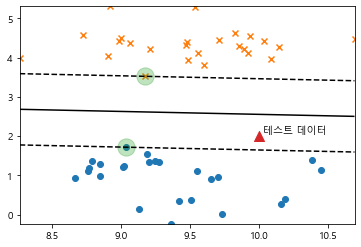

In [6]:
import numpy as np
xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)
x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "테스트 데이터")

No handles with labels found to put in legend.


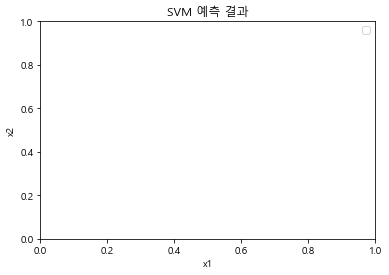

array([-0.61101582])

In [7]:
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM 예측 결과")
plt.show()
x_new = [10, 2]
model.decision_function([x_new])
model.coef_.dot(x_new) + model.intercept_

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
iris = load_iris()
X_data = iris.data[(iris.target == 0) | (iris.target == 1), :2]
y = iris.target[(iris.target == 0) | (iris.target == 1)]
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.3)
svm = SVC(kernel="linear", C=1e10)
svm.fit(X_train, y_train)
pred_y = svm.predict(X_test)
confusion_matrix(pred_y, y_test)

array([[13,  0],
       [ 0, 17]], dtype=int64)

C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


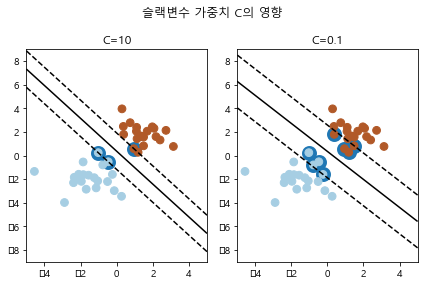

In [10]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [-1] * 20 + [1] * 20
plotnum = 1
for name, penalty in (('C=10', 10), ('C=0.1', 0.1)):
    clf = SVC(kernel='linear', C=penalty).fit(X, Y)
    xx = np.linspace(-5, 5)
    x_jin = -5
    x_jax = 5
    y_jin = -9
    y_jax = 9
    XX, YY = np.mgrid[x_jin:x_jax:200j, y_jin:y_jax:200j]
    levels = [-1, 0, 1]
    linestyles = ['dashed', 'solid', 'dashed']
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.subplot(1, 2, plotnum)
    plt.contour(XX, YY, Z, levels, colors='k', linestyles=linestyles)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120, linewidth=4)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=60, linewidth=1, cmap=plt.cm.Paired)
    plt.xlim(x_jin, x_jax)
    plt.ylim(y_jin, y_jax)
    plt.title(name)
    plotnum += 1
plt.suptitle("슬랙변수 가중치 C의 영향")
plt.tight_layout()
plt.show()